# Chapter 2

In [9]:
# data prep
import pandas as pd
import matplotlib.pyplot as plt

HRB=pd.read_csv('HRB.csv')
HRB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
Quarter     44 non-null object
Earnings    44 non-null float64
dtypes: float64(1), object(1)
memory usage: 784.0+ bytes


In [10]:
# to_datetime is clever enough to recognise '2012Q3'
HRB['Quarter'] = pd.to_datetime(HRB['Quarter'])
HRB.set_index('Quarter', inplace=True)
HRB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2007-01-01 to 2017-10-01
Data columns (total 1 columns):
Earnings    44 non-null float64
dtypes: float64(1)
memory usage: 704.0 bytes


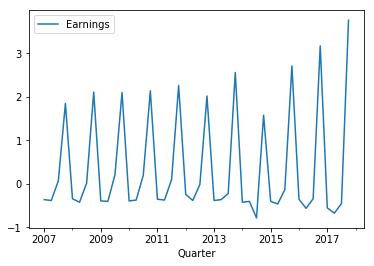

In [19]:
HRB.plot()
plt.show()

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


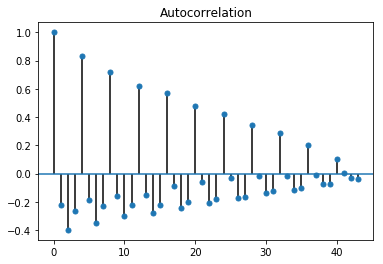

In [12]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

In [23]:
# data prep
MSFT = pd.read_csv('MSFT.csv')
MSFT['Date'] = pd.to_datetime(MSFT['Date'])
MSFT.set_index('Date', inplace=True)
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-08-06 to 2017-08-04
Data columns (total 1 columns):
Adj Close    1258 non-null float64
dtypes: float64(1)
memory usage: 19.7 KB


In [24]:
MSFT = MSFT.resample(rule='W', how='last')
returns = MSFT.pct_change().dropna()
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2012-08-19 to 2017-08-06
Freq: W-SUN
Data columns (total 1 columns):
Adj Close    260 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


/Users/Brian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """Entry point for launching an IPython kernel.


The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


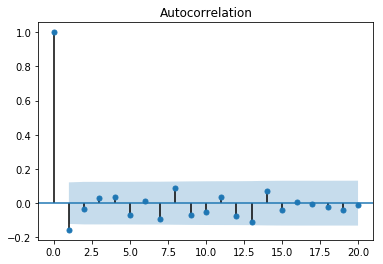

In [25]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
# 1.96 = the number of standard deviations covered by 95% of a normal distribution.
# The you divide that by the sqrt of the nuumber of observervations
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

0.061980642139300234
The mean is 0.019 and the standard deviation is 0.049


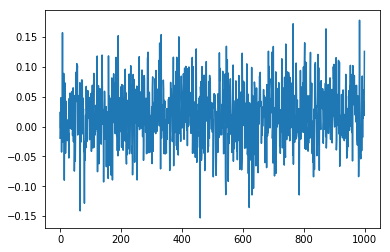

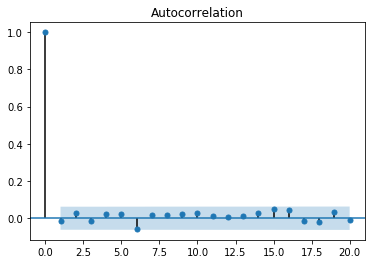

In [27]:
import numpy as np
print(1.96/sqrt(1000))

# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

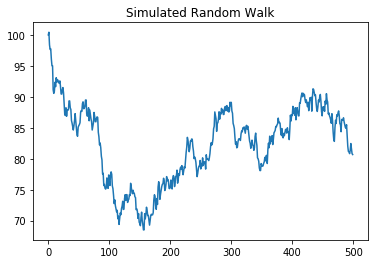

In [28]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

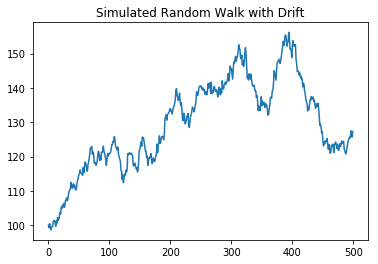

In [29]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

In [31]:
# data prep
AMZN = pd.read_csv('AMZN.csv')
AMZN['Date'] = pd.to_datetime(AMZN['Date'])
AMZN.set_index('Date', inplace=True)
AMZN['Adj Close'] = pd.to_numeric(AMZN['Adj Close'], errors='coerce')
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5088 entries, 1997-05-15 to 2017-08-02
Data columns (total 1 columns):
Adj Close    5088 non-null float64
dtypes: float64(1)
memory usage: 79.5 KB


In [33]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.025168525770744, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


The Dickey-Fuller test tests the null hyphothesis that a unit root is present in an autoregressive model. The alternative hyhpothesis is stationarity or trend-stationarity. The statistic is negative and more negative when we can the reject the hypothesis that this is not a random walk. In the Amazon case we get a positive number, 4.02 and a very high p-value.

In the dictionary, there are a series of values for difference confidence intervals. If the result was -3 - we would say the hypothesis is true with 5% confidence. If it were -3.5 - it would true with 1% confidence. This means the share 'price' is a random walk. Let's try the same rest on returns...

In [36]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.5655898083469794e-22


In [37]:
results

(-12.05345302186978,
 2.5655898083469794e-22,
 33,
 5053,
 {'1%': -3.431644800138127,
  '10%': -2.567074562815631,
  '5%': -2.86211216296977},
 -18483.377508750207)

The rate of returns is NOT a random walk, with a VERY high level of confidence. The p-value is virtually 0!

In [41]:
AMZN_ret['Adj Close'].cumsum()

Date
1997-05-16    -0.117021
1997-05-19    -0.129070
1997-05-20    -0.171752
1997-05-21    -0.299141
1997-05-22    -0.321039
1997-05-23    -0.246412
1997-05-27    -0.190856
1997-05-28    -0.223751
1997-05-29    -0.240758
1997-05-30    -0.244218
1997-06-02    -0.237273
1997-06-03    -0.257963
1997-06-04    -0.300216
1997-06-05    -0.211981
1997-06-06    -0.137657
1997-06-09    -0.118789
1997-06-10    -0.180518
1997-06-11    -0.206833
1997-06-12    -0.166293
1997-06-13    -0.179280
1997-06-16    -0.185858
1997-06-17    -0.228905
1997-06-18    -0.225445
1997-06-19    -0.225445
1997-06-20    -0.215100
1997-06-23    -0.232165
1997-06-24    -0.225220
1997-06-25    -0.225220
1997-06-26    -0.225220
1997-06-27    -0.239014
                ...    
2017-06-21    10.049518
2017-06-22    10.048590
2017-06-23    10.051027
2017-06-26    10.041303
2017-06-27    10.023999
2017-06-28    10.037871
2017-06-29    10.023331
2017-06-30    10.015205
2017-07-03    10.000391
2017-07-05    10.018993
2017-07-06 

## Stationarity
If a process is not stationary, its hard to model, and tends to have growing parameters when modeled. Exampels of this are a random walk with drift - say a stock price generally goes up. You could make this stationary by subtracting lag-1. Say you have a quarterly pattern - you can makes this stationary by subtracting lag-4. You can continue this approach into more complex models, such as removing exponential by taking the log, combining with a quarterly lag. Once you have your model, you will need to reverse these transformations to produce a prediction.

In [43]:
# data prep
HRB = pd.read_csv('HRB.csv')
#HRB['Quarter'] = pd.to_datetime(HRB['Quarter'])
HRB.set_index('Quarter', inplace=True)
HRB['Earnings'] = pd.to_numeric(HRB['Earnings'])
HRB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 2007Q1 to 2017Q4
Data columns (total 1 columns):
Earnings    44 non-null float64
dtypes: float64(1)
memory usage: 704.0+ bytes


         Earnings
Quarter          
2007Q1        NaN
2007Q2        NaN
2007Q3        NaN
2007Q4        NaN
2008Q1       0.02
2008Q2      -0.04
2008Q3      -0.05
2008Q4       0.26
2009Q1      -0.05
2009Q2       0.02


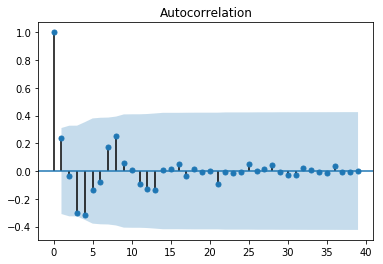

In [44]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first three three rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()